In [1]:
import pandas as pd
import numpy

In [2]:
from openpyxl import load_workbook, Workbook

wb = load_workbook(filename='/content/Data Science Case study Vindiata.xlsx')



In [3]:
wb

In [4]:
wb.worksheets

[<Worksheet "Case questions">,
 <Worksheet "AC characteristics">,
 <Worksheet "Operations">,
 <Worksheet "City pairs">]

In [5]:
for sheet in wb.worksheets:
    new_wb = Workbook()
    ws = new_wb.active
    for row_data in sheet.iter_rows():
        for row_cell in row_data:
            ws[row_cell.coordinate].value = row_cell.value

    new_wb.save('{0}.xlsx'.format(sheet.title))

In [6]:
operations=pd.read_excel("/content/Operations.xlsx")

In [7]:
operations=operations.drop([0,1,2])

#**PART A**

Airline A is currently flying a large international network. Their flight operations are shown in the tab "Operations". Various aircraft characteristics are listed in tab "AC characteristics". They would like to know the following:

1. What is the total cost by aircraft type for the year?

2. Which aircraft type has the lowest cost per seat per km flown?

In [8]:
operations=operations.drop("Airline A - hours flown",axis=1)

In [9]:
operations

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
3,A,A320,250,251.0,248.0,253.0,243.0,245.0,248.0,246.0,256.0,256.0,251.0,252.0
4,B,A330,300,301.0,298.0,303.0,293.0,295.0,298.0,296.0,306.0,306.0,301.0,302.0
5,C,B737,245,246.0,243.0,248.0,238.0,240.0,243.0,241.0,251.0,251.0,246.0,247.0
6,D,B747,310,311.0,308.0,313.0,303.0,305.0,308.0,306.0,316.0,316.0,311.0,312.0
7,E,Q400,200,201.0,198.0,203.0,193.0,195.0,198.0,196.0,206.0,206.0,201.0,202.0
8,F,ATR72,195,196.0,193.0,198.0,188.0,190.0,193.0,191.0,201.0,201.0,196.0,197.0
9,G,B747,300,301.0,298.0,303.0,293.0,295.0,298.0,296.0,306.0,306.0,301.0,302.0
10,H,Q400,195,196.0,193.0,198.0,188.0,190.0,193.0,191.0,201.0,201.0,196.0,197.0
11,I,ATR72,200,201.0,198.0,203.0,193.0,195.0,198.0,196.0,206.0,206.0,201.0,202.0
12,J,A330,310,311.0,308.0,313.0,303.0,305.0,308.0,306.0,316.0,316.0,311.0,312.0


In [10]:
print(operations.columns)

Index(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')


In [11]:
dict1={'Unnamed: 1':'Aircraft Name', 'Unnamed: 2':'Aircraft Type','Unnamed: 3':'Jan-14', 'Unnamed: 4':'Feb-14', 'Unnamed: 5':'Mar-14',
       'Unnamed: 6':'Apr-14', 'Unnamed: 7':'May-14', 'Unnamed: 8':'Jun-14', 'Unnamed: 9':'Jul-14', 'Unnamed: 10':'Aug-14',
       'Unnamed: 11':'Sep-14', 'Unnamed: 12':'Oct-14', 'Unnamed: 13':'Nov-14', 'Unnamed: 14':'Dec-14'}

In [12]:
operations.rename(columns=dict1,
          inplace=True)

In [13]:
operations

,Aircraft Name,Aircraft Type,Jan-14,Feb-14,Mar-14,Apr-14,May-14,Jun-14,Jul-14,Aug-14,Sep-14,Oct-14,Nov-14,Dec-14
3,A,A320,250,251.0,248.0,253.0,243.0,245.0,248.0,246.0,256.0,256.0,251.0,252.0
4,B,A330,300,301.0,298.0,303.0,293.0,295.0,298.0,296.0,306.0,306.0,301.0,302.0
5,C,B737,245,246.0,243.0,248.0,238.0,240.0,243.0,241.0,251.0,251.0,246.0,247.0
6,D,B747,310,311.0,308.0,313.0,303.0,305.0,308.0,306.0,316.0,316.0,311.0,312.0
7,E,Q400,200,201.0,198.0,203.0,193.0,195.0,198.0,196.0,206.0,206.0,201.0,202.0
8,F,ATR72,195,196.0,193.0,198.0,188.0,190.0,193.0,191.0,201.0,201.0,196.0,197.0
9,G,B747,300,301.0,298.0,303.0,293.0,295.0,298.0,296.0,306.0,306.0,301.0,302.0
10,H,Q400,195,196.0,193.0,198.0,188.0,190.0,193.0,191.0,201.0,201.0,196.0,197.0
11,I,ATR72,200,201.0,198.0,203.0,193.0,195.0,198.0,196.0,206.0,206.0,201.0,202.0
12,J,A330,310,311.0,308.0,313.0,303.0,305.0,308.0,306.0,316.0,316.0,311.0,312.0


In [14]:
print(operations.dtypes)

Aircraft Name     object
Aircraft Type     object
Jan-14            object
Feb-14           float64
Mar-14           float64
Apr-14           float64
May-14           float64
Jun-14           float64
Jul-14           float64
Aug-14           float64
Sep-14           float64
Oct-14           float64
Nov-14           float64
Dec-14           float64
dtype: object


In [15]:
operations["Jan-14"] = operations["Jan-14"].astype(float)

In [16]:
operations.dtypes

Aircraft Name     object
Aircraft Type     object
Jan-14           float64
Feb-14           float64
Mar-14           float64
Apr-14           float64
May-14           float64
Jun-14           float64
Jul-14           float64
Aug-14           float64
Sep-14           float64
Oct-14           float64
Nov-14           float64
Dec-14           float64
dtype: object

In [17]:
operations1=operations.groupby('Aircraft Type').sum()

In [18]:
operations1

,Jan-14,Feb-14,Mar-14,Apr-14,May-14,Jun-14,Jul-14,Aug-14,Sep-14,Oct-14,Nov-14,Dec-14
Aircraft Type,,,,,,,,,,,,
A320,1240.0,1245.0,1230.0,1255.0,1205.0,1215.0,1230.0,1220.0,1270.0,1270.0,1245.0,1250.0
A330,1820.0,1826.0,1808.0,1838.0,1778.0,1790.0,1808.0,1796.0,1856.0,1856.0,1826.0,1832.0
ATR72,795.0,799.0,787.0,807.0,767.0,775.0,787.0,779.0,819.0,819.0,799.0,803.0
B737,985.0,989.0,977.0,997.0,957.0,965.0,977.0,969.0,1009.0,1009.0,989.0,993.0
B747,920.0,923.0,914.0,929.0,899.0,905.0,914.0,908.0,938.0,938.0,923.0,926.0
Q400,790.0,794.0,782.0,802.0,762.0,770.0,782.0,774.0,814.0,814.0,794.0,798.0


#Total Hours Flown in a year is found out by summing the hours flown in each month

In [19]:
operations1['Total Hours flown']=operations1.sum(axis=1)

In [20]:
operations1

,Jan-14,Feb-14,Mar-14,Apr-14,May-14,Jun-14,Jul-14,Aug-14,Sep-14,Oct-14,Nov-14,Dec-14,Total Hours flown
Aircraft Type,,,,,,,,,,,,,
A320,1240.0,1245.0,1230.0,1255.0,1205.0,1215.0,1230.0,1220.0,1270.0,1270.0,1245.0,1250.0,14875.0
A330,1820.0,1826.0,1808.0,1838.0,1778.0,1790.0,1808.0,1796.0,1856.0,1856.0,1826.0,1832.0,21834.0
ATR72,795.0,799.0,787.0,807.0,767.0,775.0,787.0,779.0,819.0,819.0,799.0,803.0,9536.0
B737,985.0,989.0,977.0,997.0,957.0,965.0,977.0,969.0,1009.0,1009.0,989.0,993.0,11816.0
B747,920.0,923.0,914.0,929.0,899.0,905.0,914.0,908.0,938.0,938.0,923.0,926.0,11037.0
Q400,790.0,794.0,782.0,802.0,762.0,770.0,782.0,774.0,814.0,814.0,794.0,798.0,9476.0


Text(0, 0.5, 'Total Hours Flown In A Year')

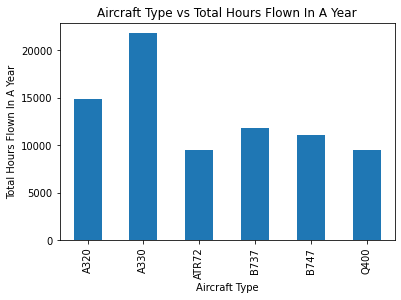

In [21]:
ax=operations1['Total Hours flown'].plot(kind="bar")
ax.set_title("Aircraft Type vs Total Hours Flown In A Year")
ax.set_xlabel("Aircraft Type")
ax.set_ylabel("Total Hours Flown In A Year")

In [22]:
import plotly.express as px

In [112]:
fig = px.bar(operations1, y="Total Hours flown",title="Aircraft Type vs Total Hours Flown In A Year",color_discrete_sequence=["orangered"])
fig.update_layout(
    title={
        'text': "Aircraft Type vs Total Hours Flown In A Year",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [24]:
ac_characteristics=pd.read_excel("/content/AC characteristics.xlsx",header=3)

In [25]:
ac_characteristics

,Unnamed: 0,Aircraft Type,Range (Km),Ave. Speed (km/h),Number of Seats,Costs per flight hour
0,NaN,A320,5000,800,150,5000
1,NaN,A330,8000,900,250,7500
2,NaN,B737,5000,800,150,5100
3,NaN,B747,10000,900,350,12000
4,NaN,Q400,1500,750,90,3500
5,NaN,ATR72,1000,650,75,2750


In [26]:
ac_characteristics.drop('Unnamed: 0',axis=1,inplace=True)

In [27]:
ac_characteristics.set_index('Aircraft Type',inplace=True)

In [28]:
ac_characteristics.sort_values(by='Aircraft Type',ascending=True,inplace=True)

In [29]:
ac_characteristics['Total Hours flown'] = operations1['Total Hours flown']

In [30]:
ac_characteristics['Total cost']=ac_characteristics['Total Hours flown']*ac_characteristics['Costs per flight hour']

In [31]:
ac_characteristics

,Range (Km),Ave. Speed (km/h),Number of Seats,Costs per flight hour,Total Hours flown,Total cost
Aircraft Type,,,,,,
A320,5000,800,150,5000,14875.0,74375000.0
A330,8000,900,250,7500,21834.0,163755000.0
ATR72,1000,650,75,2750,9536.0,26224000.0
B737,5000,800,150,5100,11816.0,60261600.0
B747,10000,900,350,12000,11037.0,132444000.0
Q400,1500,750,90,3500,9476.0,33166000.0


## Cost per seat per km = Total cost * Number of speed * Average Speed * Total Hours Flown

In [32]:
ac_characteristics['Cost per seat per km']=(ac_characteristics['Total cost'])/((ac_characteristics['Number of Seats'])*(ac_characteristics['Ave. Speed (km/h)'])*(ac_characteristics['Total Hours flown']))

In [33]:
ac_characteristics

,Range (Km),Ave. Speed (km/h),Number of Seats,Costs per flight hour,Total Hours flown,Total cost,Cost per seat per km
Aircraft Type,,,,,,,
A320,5000,800,150,5000,14875.0,74375000.0,0.041667
A330,8000,900,250,7500,21834.0,163755000.0,0.033333
ATR72,1000,650,75,2750,9536.0,26224000.0,0.056410
B737,5000,800,150,5100,11816.0,60261600.0,0.042500
B747,10000,900,350,12000,11037.0,132444000.0,0.038095
Q400,1500,750,90,3500,9476.0,33166000.0,0.051852


### It can be observed that aircraft type A330 has the lowest cost per seat per km flown compared to all other aircraft types


In [104]:

fig2 = px.bar(ac_characteristics, y="Cost per seat per km",color_discrete_sequence=["skyblue"])
fig2.update_layout(
    title={
        'text': "Aircraft Type vs Cost per seat per km",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig2.show()

In [113]:
fig3 = px.bar(ac_characteristics, y="Total cost",title="Aircraft Type vs Total Cost For The Year")
fig3.update_layout(
    title={
        'text': "Aircraft Type vs Total Cost For The Year",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig3.show()

In [62]:
with open('p_graph3.html', 'a') as f:
    f.write(fig3.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig2.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))

#**PART B**

## Finding suitable airline for travel

An aircraft could only be used to travel between two cities if its range is greater than the distance between the cities

If the range of the aircraft is greater than distance between the cities then cost to travel between two cities can be found out

Cost to travel between two cities= Cost per seat per km * Distance between two cities * Number of seats * (Passenger Demand per day / Number of seats)

Number of trips is decided by number of seats in aircraft and passenger demand per day

In [36]:
citypairs=pd.read_excel("/content/City pairs.xlsx",header=3)

In [37]:
citypairs.drop('Unnamed: 0',axis=1,inplace=True)

In [38]:
import copy

In [39]:
ac_characteristics1=ac_characteristics.copy()

In [40]:
ac_characteristics1

,Range (Km),Ave. Speed (km/h),Number of Seats,Costs per flight hour,Total Hours flown,Total cost,Cost per seat per km
Aircraft Type,,,,,,,
A320,5000,800,150,5000,14875.0,74375000.0,0.041667
A330,8000,900,250,7500,21834.0,163755000.0,0.033333
ATR72,1000,650,75,2750,9536.0,26224000.0,0.056410
B737,5000,800,150,5100,11816.0,60261600.0,0.042500
B747,10000,900,350,12000,11037.0,132444000.0,0.038095
Q400,1500,750,90,3500,9476.0,33166000.0,0.051852


In [41]:
ac_characteristics1['AA-BB']=""
ac_characteristics1['BB-CC']=""
ac_characteristics1['CC-AA']=""
ac_characteristics1['AA-DD']=""


In [42]:
ac_characteristics1.drop(['Total Hours flown','Total cost'],axis=1,inplace=True)

In [43]:
ac_characteristics1

,Range (Km),Ave. Speed (km/h),Number of Seats,Costs per flight hour,Cost per seat per km,AA-BB,BB-CC,CC-AA,AA-DD
Aircraft Type,,,,,,,,,
A320,5000,800,150,5000,0.041667,,,,
A330,8000,900,250,7500,0.033333,,,,
ATR72,1000,650,75,2750,0.056410,,,,
B737,5000,800,150,5100,0.042500,,,,
B747,10000,900,350,12000,0.038095,,,,
Q400,1500,750,90,3500,0.051852,,,,


In [44]:
ac_characteristics1.dtypes

Range (Km)                 int64
Ave. Speed (km/h)          int64
Number of Seats            int64
Costs per flight hour      int64
Cost per seat per km     float64
AA-BB                     object
BB-CC                     object
CC-AA                     object
AA-DD                     object
dtype: object

In [45]:
citypairs.dtypes

Origin City                 object
Desitnation City            object
Pass. Demand \n(per day)     int64
Distance (km)                int64
dtype: object

In [46]:
for i in ac_characteristics1.index:
    print(i)
    if (citypairs["Distance (km)"][0] > ac_characteristics1["Range (Km)"][i]):
          
          ac_characteristics1["AA-BB"][i]=None
    else:
          ac_characteristics1["AA-BB"][i]=ac_characteristics1["Cost per seat per km"][i]*citypairs["Distance (km)"][0]*(citypairs["Pass. Demand \n(per day)"][0]/ac_characteristics1["Number of Seats"][i])
         

A320
A330
ATR72
B737
B747
Q400


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
for i in ac_characteristics1.index:
  
    if (citypairs["Distance (km)"][0] > ac_characteristics1["Range (Km)"][i]):
          
          ac_characteristics1["AA-BB"][i]=None
    else:
          ac_characteristics1["AA-BB"][i]=ac_characteristics1["Cost per seat per km"][i]*citypairs["Distance (km)"][0]*numpy.ceil(citypairs["Pass. Demand \n(per day)"][0]/ac_characteristics1["Number of Seats"][i])*ac_characteristics1["Number of Seats"][i]
         

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
for i in ac_characteristics1.index:
    print(i)
    if (citypairs["Distance (km)"][1] > ac_characteristics1["Range (Km)"][i]):
          
          ac_characteristics1["BB-CC"][i]=None
    else:
          ac_characteristics1["BB-CC"][i]=ac_characteristics1["Cost per seat per km"][i]*citypairs["Distance (km)"][1]*numpy.ceil(citypairs["Pass. Demand \n(per day)"][1]/ac_characteristics1["Number of Seats"][i])*ac_characteristics1["Number of Seats"][i]
         

A320
A330
ATR72
B737
B747
Q400


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
for i in ac_characteristics1.index:
  
    if (citypairs["Distance (km)"][2] > ac_characteristics1["Range (Km)"][i]):
          
          ac_characteristics1["CC-AA"][i]=None
    else:
          ac_characteristics1["CC-AA"][i]=ac_characteristics1["Cost per seat per km"][i]*citypairs["Distance (km)"][2]*numpy.ceil(citypairs["Pass. Demand \n(per day)"][2]/ac_characteristics1["Number of Seats"][i])*ac_characteristics1["Number of Seats"][i]
         

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
for i in ac_characteristics1.index:
  
    if (citypairs["Distance (km)"][3] > ac_characteristics1["Range (Km)"][i]):
          
          ac_characteristics1["AA-DD"][i]=None
    else:
          ac_characteristics1["AA-DD"][i]=ac_characteristics1["Cost per seat per km"][i]*citypairs["Distance (km)"][3]*numpy.ceil(citypairs["Pass. Demand \n(per day)"][3]/ac_characteristics1["Number of Seats"][i])*ac_characteristics1["Number of Seats"][i]
         

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
ac_characteristics1

,Range (Km),Ave. Speed (km/h),Number of Seats,Costs per flight hour,Cost per seat per km,AA-BB,BB-CC,CC-AA,AA-DD
Aircraft Type,,,,,,,,,
A320,5000,800,150,5000,0.041667,56250.0,None,5000.0,12500.0
A330,8000,900,250,7500,0.033333,50000.0,108333.333333,6666.666667,16666.666667
ATR72,1000,650,75,2750,0.056410,None,None,6769.230769,16923.076923
B737,5000,800,150,5100,0.042500,57375.0,None,5100.0,12750.0
B747,10000,900,350,12000,0.038095,80000.0,173333.333333,5333.333333,13333.333333
Q400,1500,750,90,3500,0.051852,None,None,7466.666667,18666.666667


In [66]:
import plotly.graph_objects as go

import plotly.graph_objects as go
  
fig = go.Figure(data=[go.Table(
    header=dict(values=ac_characteristics2.columns),
    cells=dict(values=))])
fig.show()


SyntaxError: ignored

In [55]:
ac_characteristics2=ac_characteristics1.copy()

In [56]:
ac_characteristics2.columns

Index(['Range (Km)', 'Ave. Speed (km/h)', 'Number of Seats',
       'Costs per flight hour', 'Cost per seat per km', 'AA-BB', 'BB-CC',
       'CC-AA', 'AA-DD'],
      dtype='object')

In [57]:
ac_characteristics2["Aircraft Type"]=ac_characteristics1.index

In [ ]:
fig3 = px.bar(operations1, y="Total cost",title="Aircraft Type vs Total Cost For The Year")
fig3.update_layout(
    title={
        'text': "Aircraft Type vs Total Cost For The Year",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig3.show()

In [66]:
import plotly.graph_objects as go

In [59]:
ac_characteristics2["AA-BB"]

Aircraft Type
A320     56250.0
A330     50000.0
ATR72       None
B737     57375.0
B747     80000.0
Q400        None
Name: AA-BB, dtype: object

In [101]:
ac_characteristics2.columns

Index(['Range (Km)', 'Ave. Speed (km/h)', 'Number of Seats',
       'Costs per flight hour', 'Cost per seat per km', 'AA-BB', 'BB-CC',
       'CC-AA', 'AA-DD', 'Aircraft Type'],
      dtype='object')

In [114]:
import plotly.graph_objects as go
import pandas as pd



fig4 = go.Figure(data=[go.Table(
    header=dict(values=list(ac_characteristics2.columns[5:]),
                fill_color='aqua',
                align='left'),
    cells=dict(values=[ac_characteristics2["AA-BB"],ac_characteristics2["BB-CC"],ac_characteristics2["CC-AA"],ac_characteristics2["AA-DD"],ac_characteristics2["Aircraft Type"],],
               fill_color='lavender',
               align='left'))
])

fig4.update_layout(
    title={
        'text': "Aircraft Type vs Cost observed in each city pair",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig4.show()

In [116]:
with open('p_graph4.html', 'a') as f:
    f.write(fig3.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig2.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig4.to_html(full_html=False, include_plotlyjs='cdn'))

It can be observed that 

*   for city pair AA-BB, the low cost airtype would be A330  = 50000

*   for city pair BB-CC, the low cost airtype would be A330 =108333.333

*   for city pair CC-AA, the low cost airtype would be A320 = 5000.0 and

*   for city pair BB-CC, the low cost airtype would be A320 =12500.0







